In [1]:
import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training Images: {}, {}". format(train_images.shape, train_labels.shape))

Training Images: (60000, 28, 28), (60000,)


In [3]:
print("Test Images: {}, {}". format(test_images.shape, test_labels.shape))

Test Images: (10000, 28, 28), (10000,)


In [4]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


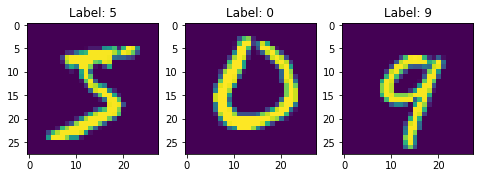

In [5]:
plt.figure(figsize=(8,5))

plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.title("Label: {}".format(test_labels[12]))

plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
x_train = train_images[0:50000]
x_val = train_images[50000:60000]
y_train = train_labels[0:50000]
y_val = train_labels[50000:60000]


print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_val: {}".format(y_val.shape))

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [8]:
# reshpaing the data
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [9]:
print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images.shape))


x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [10]:
from tensorflow.keras.utils import to_categorical

no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
test_labels = to_categorical(test_labels, no_labels)

In [11]:
# X = tf.placeholder(tf.float32, [None, new_dimension])
# Y = tf.placeholder(tf.float32, [None, no_labels])

# # create model architecture
# def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):

#     first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
#     first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
#     first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

#     second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
#     second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
#     second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), 
#     second_bias))

#     final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
#     final_bias = tf.Variable(tf.zeros([no_classes]))
#     logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

#     return logits

In [12]:
# logits = multilayer_perceptron(X, no_labels)
# learning_rate = 0.01

# #we define the loss and optimiser for the network
# loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
# optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
# train_op = optimiser.minimize(loss_op)

# init = tf.global_variables_initializer()
# epochs = 20
# batch_size = 1000
# iteration = len(x_train) // batch_size

# with tf.Session() as session:
#     session.run(init)
#     for epoch in range(epochs):
#     average_cost = 0
#     start, end = 0, batch_size
#     for i in range(iteration):
#     batch_x, batch_y = x_train[start: end], y_train[start: end]
#     _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
#     start += batch_size
#     end += batch_size 
#     #average loss
#     average_cost += loss/iteration
#     print("Epoch========{}".format(epoch))
 
#     #evaluate model
#     prediction = tf.nn.softmax(logits)
#     ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
#     accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
#     print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))


In [14]:
# Building a sequential FeedForward Neural Network in Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (new_dimension,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(no_labels, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer= 'adam', loss = tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)


Epoch 1/20
50/50 [==============================] - 8s 49ms/step - loss: 0.6878 - accuracy: 0.8216 - val_loss: 0.2531 - val_accuracy: 0.9278
Epoch 2/20
50/50 [==============================] - 1s 27ms/step - loss: 0.2327 - accuracy: 0.9327 - val_loss: 0.1858 - val_accuracy: 0.9488
Epoch 3/20
50/50 [==============================] - 2s 31ms/step - loss: 0.1700 - accuracy: 0.9514 - val_loss: 0.1484 - val_accuracy: 0.9572
Epoch 4/20
50/50 [==============================] - 1s 28ms/step - loss: 0.1325 - accuracy: 0.9615 - val_loss: 0.1258 - val_accuracy: 0.9641
Epoch 5/20
50/50 [==============================] - 1s 27ms/step - loss: 0.1073 - accuracy: 0.9689 - val_loss: 0.1110 - val_accuracy: 0.9681
Epoch 6/20
50/50 [==============================] - 1s 27ms/step - loss: 0.0890 - accuracy: 0.9748 - val_loss: 0.1054 - val_accuracy: 0.9685
Epoch 7/20
50/50 [==============================] - 2s 45ms/step - loss: 0.0759 - accuracy: 0.9785 - val_loss: 0.0987 - val_accuracy: 0.9688
Epoch 8/20
50

In [16]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_accuracy))


313/313 [==============================] - 2s 4ms/step - loss: 0.0773 - accuracy: 0.9783
Test loss: 0.07729291170835495
Test Accuracy: 0.9782999753952026


Text(0.5, 1.0, 'Loss Curve - before regularization')

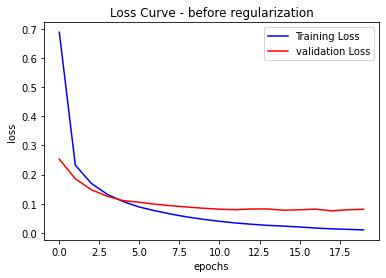

In [19]:
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training Loss', 'validation Loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Curve - before regularization')


In [21]:
from tensorflow.keras.layers import Dropout

reg_model = Sequential()
reg_model.add(Dense(256, activation = 'relu', input_shape = (new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation = 'relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation = 'softmax'))

reg_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [23]:

reg_model.compile(optimizer='adam', loss = tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])
reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size = 1000)



Epoch 1/20
50/50 [==============================] - 5s 67ms/step - loss: 0.9610 - accuracy: 0.6983 - val_loss: 0.2943 - val_accuracy: 0.9155
Epoch 2/20
50/50 [==============================] - 1s 27ms/step - loss: 0.3750 - accuracy: 0.8888 - val_loss: 0.1984 - val_accuracy: 0.9434
Epoch 3/20
50/50 [==============================] - 1s 26ms/step - loss: 0.2800 - accuracy: 0.9178 - val_loss: 0.1599 - val_accuracy: 0.9547
Epoch 4/20
50/50 [==============================] - 2s 45ms/step - loss: 0.2305 - accuracy: 0.9339 - val_loss: 0.1380 - val_accuracy: 0.9600
Epoch 5/20
50/50 [==============================] - 3s 70ms/step - loss: 0.1964 - accuracy: 0.9419 - val_loss: 0.1214 - val_accuracy: 0.9641
Epoch 6/20
50/50 [==============================] - 3s 65ms/step - loss: 0.1747 - accuracy: 0.9474 - val_loss: 0.1102 - val_accuracy: 0.9677
Epoch 7/20
50/50 [==============================] - 3s 65ms/step - loss: 0.1530 - accuracy: 0.9546 - val_loss: 0.1018 - val_accuracy: 0.9693
Epoch 8/20
50

In [24]:
test_loss, test_accuracy = reg_model.evaluate(test_images, test_labels)
print('Test loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_accuracy))


313/313 [==============================] - 5s 5ms/step - loss: 0.0683 - accuracy: 0.9795
Test loss: 0.06830349564552307
Test Accuracy: 0.9794999957084656


Text(0.5, 1.0, 'Loss Curve - before regularization')

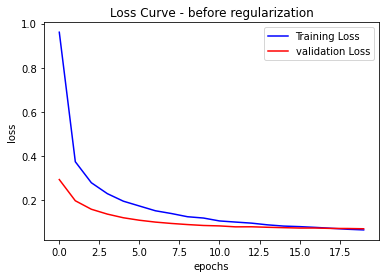

In [25]:
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training Loss', 'validation Loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Curve - before regularization')
